In [ ]:
#!pip install nltk
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download es_core_news_sm
#!pip install textblob
#!python -m textblob.download_corpora

In [1]:
#Carga de las biblitecas NLTK y SSL
#========================================================================
import nltk
import ssl

#Segmento para evitar problemas con los certificados de seguridad al descargar los pquetes requeridos
#========================================================================
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#Descargar de paquetes
#========================================================================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

/home/julio/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
[nltk_data] Downloading package punkt to
[nltk_data]     /home/julio/snap/jupyter/6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/julio/snap/jupyter/6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/julio/snap/jupyter/6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/julio/snap/jupyter/6/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
#Tokenizando usando SPACY. Token separados por coma
#========================================================================
import spacy

#Carga diccionario español
#========================================================================
nlp = spacy.load("es_core_news_sm")
texto = "De algo estoy seguro, en estos momentos hay personas que ya están detenidas, yo no puedo entregar detalles porque no acostumbro a entregar detalles de las investigaciones, también podría entorpecer el normal curso de éstas, pero decirles que vamos a hacer todo lo humanamente posible y están todos los funcionarios trabajando en la Región Metropolitana para poder sacar resultado lo más rápidamente posible"
doc = nlp(texto)
tokens = [token for token in doc]
print(tokens)

[De, algo, estoy, seguro, ,, en, estos, momentos, hay, personas, que, ya, están, detenidas, ,, yo, no, puedo, entregar, detalles, porque, no, acostumbro, a, entregar, detalles, de, las, investigaciones, ,, también, podría, entorpecer, el, normal, curso, de, éstas, ,, pero, decirles, que, vamos, a, hacer, todo, lo, humanamente, posible, y, están, todos, los, funcionarios, trabajando, en, la, Región, Metropolitana, para, poder, sacar, resultado, lo, más, rápidamente, posible]


In [3]:
#Tokenizando, sin separar por palabra, usando NLTK
#=======================================================================
from nltk.tokenize import sent_tokenize
texto="De algo estoy seguro, en estos momentos hay personas que ya están detenidas, yo no puedo entregar detalles porque no acostumbro a entregar detalles de las investigaciones, también podría entorpecer el normal curso de éstas, pero decirles que vamos a hacer todo lo humanamente posible y están todos los funcionarios trabajando en la Región Metropolitana para poder sacar resultado lo más rápidamente posible"
tokens=sent_tokenize(texto)
print(tokens)

['De algo estoy seguro, en estos momentos hay personas que ya están detenidas, yo no puedo entregar detalles porque no acostumbro a entregar detalles de las investigaciones, también podría entorpecer el normal curso de éstas, pero decirles que vamos a hacer todo lo humanamente posible y están todos los funcionarios trabajando en la Región Metropolitana para poder sacar resultado lo más rápidamente posible']


In [4]:
#Tokenizando por palabra usando NLTK
#=======================================================================
from nltk.tokenize import word_tokenize
tokens=word_tokenize(texto)
print(tokens)

['De', 'algo', 'estoy', 'seguro', ',', 'en', 'estos', 'momentos', 'hay', 'personas', 'que', 'ya', 'están', 'detenidas', ',', 'yo', 'no', 'puedo', 'entregar', 'detalles', 'porque', 'no', 'acostumbro', 'a', 'entregar', 'detalles', 'de', 'las', 'investigaciones', ',', 'también', 'podría', 'entorpecer', 'el', 'normal', 'curso', 'de', 'éstas', ',', 'pero', 'decirles', 'que', 'vamos', 'a', 'hacer', 'todo', 'lo', 'humanamente', 'posible', 'y', 'están', 'todos', 'los', 'funcionarios', 'trabajando', 'en', 'la', 'Región', 'Metropolitana', 'para', 'poder', 'sacar', 'resultado', 'lo', 'más', 'rápidamente', 'posible']


In [5]:
#Distribucion de frecuencias
#samples= palabras unicas y outcomes=total de palabras
#========================================================================
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
print(fdist)

<FreqDist with 54 samples and 67 outcomes>


In [6]:
#Palabras mas comunes
#"Top Five" de palabras
#========================================================================
fdist.most_common(5)

[(',', 4), ('en', 2), ('que', 2), ('están', 2), ('no', 2)]

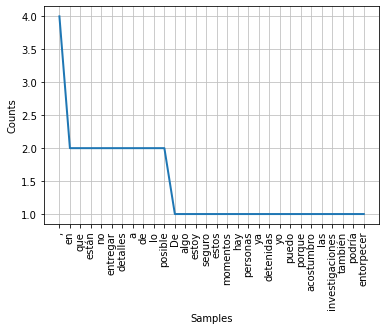

In [8]:
# Grafico de distribucion de frecuencias
#========================================================================
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [9]:
# STOP WORDS
# Palabras vacías consideradas como ruido en el texto. El texto puede contener palabras vacías como vuestro
# muy, esto, etc.
# NLTK elimina palabras vacías:  crear una lista de palabras vacías y filtrar lista de tokens 
# a partir de estas palabras.

from nltk.corpus import stopwords
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'el', 'nosotras', 'esté', 'eso', 'lo', 'tuyo', 'serían', 'seamos', 'estaría', 'durante', 'sería', 'hubieron', 'habíais', 'estará', 'y', 'habremos', 'una', 'los', 'ha', 'estadas', 'este', 'fuera', 'nuestros', 'hubo', 'teníamos', 'todos', 'habrán', 'fuerais', 'estarás', 'sin', 'habréis', 'tuvieron', 'habíamos', 'hayáis', 'habido', 'estuviste', 'habríamos', 'tuvieras', 'serán', 'fueses', 'esas', 'estuviéramos', 'siente', 'tendrían', 'tenías', 'la', 'hayamos', 'tuya', 'nuestra', 'nos', 'fueseis', 'tendréis', 'ni', 'vosotras', 'tuvierais', 'tienen', 'suyas', 'tengas', 'éramos', 'estamos', 'hubisteis', 'ante', 'han', 'sobre', 'míos', 'estaríais', 'estuvieses', 'hasta', 'está', 'sentido', 'tus', 'tenían', 'estaremos', 'ella', 'fuesen', 'fui', 'uno', 'estaba', 'esto', 'estaríamos', 'fuiste', 'tenida', 'somos', 'tengo', 'hubieses', 'sentid', 'les', 'habrá', 'tendrá', 'suya', 'habían', 'estuvierais', 'tenido', 'sois', 'entre', 'desde', 'habías', 'otros', 'ellas', 'estés', 'al', 'con', 'estuvies

In [10]:
#Filtramos el Texto Original usando las palabras vacias (Stop Words version Español)
#===================================================================
filtered_sent=[]
for w in tokens:
    if w not in stop_words:
        filtered_sent.append(w)
print("Texto roginal tokenizado:",tokens)
print("Texto Filtrado:",filtered_sent)

Texto roginal tokenizado: ['De', 'algo', 'estoy', 'seguro', ',', 'en', 'estos', 'momentos', 'hay', 'personas', 'que', 'ya', 'están', 'detenidas', ',', 'yo', 'no', 'puedo', 'entregar', 'detalles', 'porque', 'no', 'acostumbro', 'a', 'entregar', 'detalles', 'de', 'las', 'investigaciones', ',', 'también', 'podría', 'entorpecer', 'el', 'normal', 'curso', 'de', 'éstas', ',', 'pero', 'decirles', 'que', 'vamos', 'a', 'hacer', 'todo', 'lo', 'humanamente', 'posible', 'y', 'están', 'todos', 'los', 'funcionarios', 'trabajando', 'en', 'la', 'Región', 'Metropolitana', 'para', 'poder', 'sacar', 'resultado', 'lo', 'más', 'rápidamente', 'posible']
Texto Filtrado: ['De', 'seguro', ',', 'momentos', 'personas', 'detenidas', ',', 'puedo', 'entregar', 'detalles', 'acostumbro', 'entregar', 'detalles', 'investigaciones', ',', 'podría', 'entorpecer', 'normal', 'curso', 'éstas', ',', 'decirles', 'vamos', 'hacer', 'humanamente', 'posible', 'funcionarios', 'trabajando', 'Región', 'Metropolitana', 'poder', 'sacar'

In [11]:
# Stemming
# La derivación es un proceso de normalización lingüística, que reduce las palabras a su palabra raíz o elimina 
# los afijos derivados. Por ejemplo, conexión, conectado, palabra de conexión se reduce a una palabra 
# común "conectar".
#===========================================================================================
# Esta opcion funciona correctamente para texto en ingles, español tiene multiples problemas
#===========================================================================================
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Texto Filtado:",filtered_sent)
print("Texto con palabras primitivas (Derivadas):",stemmed_words)

Texto Filtado: ['De', 'seguro', ',', 'momentos', 'personas', 'detenidas', ',', 'puedo', 'entregar', 'detalles', 'acostumbro', 'entregar', 'detalles', 'investigaciones', ',', 'podría', 'entorpecer', 'normal', 'curso', 'éstas', ',', 'decirles', 'vamos', 'hacer', 'humanamente', 'posible', 'funcionarios', 'trabajando', 'Región', 'Metropolitana', 'poder', 'sacar', 'resultado', 'rápidamente', 'posible']
Texto con palabras primitivas (Derivadas): ['de', 'seguro', ',', 'momento', 'persona', 'detenida', ',', 'puedo', 'entregar', 'detal', 'acostumbro', 'entregar', 'detal', 'investigacion', ',', 'podría', 'entorpec', 'normal', 'curso', 'ésta', ',', 'decirl', 'vamo', 'hacer', 'humanament', 'posibl', 'funcionario', 'trabajando', 'región', 'metropolitana', 'poder', 'sacar', 'resultado', 'rápidament', 'posibl']


In [ ]:
#Lexicon Normalization
#Igual que la accion anterior (Stemming)
#La lematización reduce las palabras a su palabra base, que son lemas lingüísticamente correctos. 
#Transforma palabra raíz con el uso de vocabulario y análisis morfológico. 
#La lematización suele ser más sofisticada que la derivación. 
#Stemmer trabaja con una palabra individual sin conocimiento del contexto. 
#Por ejemplo, la palabra "mejor" tiene "bueno" como lema. 
#Esto se perderá al derivar porque requiere una búsqueda en el diccionario.

#===========================================================================================
# Esta opcion funciona correctamente para texto en ingles, español tiene multiples problemas
#===========================================================================================

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

texto = "running"
print("Lemmatized Word:",lem.lemmatize(texto,"v"))
print("Stemmed Word:",stem.stem(texto))

In [12]:
#Clasificacion de los tokens
#===========================================================================================
# Esta opcion funciona correctamente para texto en ingles, español tiene multiples problemas
#===========================================================================================
nltk.pos_tag(filtered_sent)

[('De', 'NNP'),
 ('seguro', 'NN'),
 (',', ','),
 ('momentos', 'FW'),
 ('personas', 'FW'),
 ('detenidas', 'NN'),
 (',', ','),
 ('puedo', 'NN'),
 ('entregar', 'NN'),
 ('detalles', 'NNS'),
 ('acostumbro', 'VBP'),
 ('entregar', 'JJ'),
 ('detalles', 'NNS'),
 ('investigaciones', 'NNS'),
 (',', ','),
 ('podría', 'JJ'),
 ('entorpecer', 'NN'),
 ('normal', 'JJ'),
 ('curso', 'NN'),
 ('éstas', 'NNS'),
 (',', ','),
 ('decirles', 'NNS'),
 ('vamos', 'VBP'),
 ('hacer', 'NN'),
 ('humanamente', 'NN'),
 ('posible', 'JJ'),
 ('funcionarios', 'NNS'),
 ('trabajando', 'VBP'),
 ('Región', 'NNP'),
 ('Metropolitana', 'NNP'),
 ('poder', 'NN'),
 ('sacar', 'NN'),
 ('resultado', 'NN'),
 ('rápidamente', 'NN'),
 ('posible', 'JJ')]

In [13]:
#Lista de tags:
#CC Conjunción de coordinación
#CD dígito cardinal
#DT Determinador
#EX existencial allí (como: “hay”… piensa en ello como “existe”)
#FW palabra extranjera
#IN preposición/junta subordinación
#JJ  Adjetivo ‘grande’
#JJR Adjetivo comparativo ‘más grande
#JJS, Adjetivo  superlativo ‘más grande’.
#LS Marcador de lista  1)
#MD modal podría, podrá
#NN sustantivo, singular “desk” (escritorio)
#NNS sustantivo plural ‘escritorios
#NNP sustantivo propio, singular “Harrison”
#NNPS sustantivo propio, plural ‘Americanos
#PDT Predeterminador ‘todos los niños’.
#POS posesivo final ‘de los padres’
#PRP pronombre personal ‘él, ella’
#PRP$ pronombre posesivo ‘mi, suyo, de ella’
#RB adverbio muy, silenciosamente,
#RBR, Adverbio  comparativamente mejor
#RBS adverbio, superlativo mejor
#RP partículas
#TO particula de infinitivo
#UH interjección jajaa
#VB verbo, ‘beber’
#VBD verbo, tiempo pasado ‘tomó’
#VBG verbo, gerundio/presente participio tomando
#VBN verbo, participio pasado tomado
#VBP verbo, cantar presente
#VBZ verbo, tercera persona
#WDT wh-determiner (which…)
#WP pronombre de pregunta (quién, qué)
#WP$ posesivo con pronombre (cuyo)
#WRB wh-abverb (donde, cuando)

In [14]:
#Analisis de sentimiento con exto en ingles y luego traducido al español
#La polaridad  entre -1 y 1, donde -1 es una declaración negativa y 1 es una declaración positiva. 
#La subjetividad es la puntuación de TextBlobs. Si la declaración se considera más basada en una opinión o
#basada en hechos. Un puntaje de subjetividad más alto significa que es menos objetivo y, por lo tanto,
#tendría muchas opiniones.
#===========================================================================================
# Esta opcion funciona correctamente para texto en ingles, español tiene multiples problemas
#===========================================================================================

from textblob import TextBlob
 
texto = TextBlob("This table is black")

#Realizacion del analisis de sentimiento
print(texto.sentiment)
 
#Categorizacion de los tokens
print(texto.tags)
 
#Traduccion del texto  Español
print(texto.translate(to='es'))
 
#Funciones disponibles para la clase analysis
#print(dir(analysis))

Sentiment(polarity=-0.16666666666666666, subjectivity=0.43333333333333335)
[('This', 'DT'), ('table', 'NN'), ('is', 'VBZ'), ('black', 'JJ')]
Esta mesa es negra


In [15]:
#Otra opcion, mas basica que la anterior,  es util para analizar texto en español
#!pip install sentiment-analysis-spanish
#!pip install keras tensorflow
from sentiment_analysis_spanish import sentiment_analysis

In [16]:
#La función sentiment(text) devuelve un número entre 0 y 1. 
#Esta es la probabilidad de que el texto de la variable sea "positivo". 
#Las probabilidades bajas significan que el texto es negativo (números cercanos a 0), las probabilidades altas
#(números cercanos a 1) significan que el texto es positivo. 
#El espacio intermedio corresponde a textos neutrales.

In [17]:
#Ejemplo 1
texto1 = sentiment_analysis.SentimentAnalysisSpanish()
print(texto1.sentiment("Este curso es el mejor"))

0.9625667149123897


/home/julio/snap/jupyter/common/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/julio/snap/jupyter/common/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [18]:
#Ejemplo 2
texto2 = sentiment_analysis.SentimentAnalysisSpanish()
print(texto2.sentiment("no es bueno lo que esta sucediendo"))

0.0043090799740708886
